# Algorithms

In [84]:
def getMin(Q):
    V = len(Q)
    s = Q[0]
    for i in range(V):
        if Q[i][1] < s[1]:
            s = Q[i]
    return s

def Dijkstra_MA(G, source, V):   #V is total number of vertices
    Q = []                       
    d,pi,S = [], [], []
    for v in range(V): 
        d.append(1e99)    #shortest distance from source to node v
        pi.append(None)   #predececent node
        S.append(0)       #Solution set (visited or not)
         
    d[source] = 0
    for v in range(V): Q.append((v, d[v]))    #Q[x] = (to, cost)                   #O(V)
    
    while (len(Q) != 0):                                                           #loop V times                                             #V + (V-1) + (V-2) + ... + (1) = O(V^2)
        #u = min(Q, key=lambda x: x[1])  #extract minimum
        u = getMin(Q)
        cn = u[0]        #current node
        S[cn] = 1        #current node is visited
        Q.remove(u)
        
        for v in range(V):                                                        #V * V = O(V^2)
            if v!= u and G[cn][v] != None:    #neighbour
                if S[v] != 1 and d[v] > d[cn] + G[cn][v]:   #found a shorter path
                    Q.remove((v, d[v]))              #remove to amend
                    d[v] = d[cn] + G[cn][v]
                    pi[v] = cn
                    Q.append((v, d[v]))              #put back into Q with the new smaller cost
                    


In [85]:
from collections import defaultdict

#Implementation of Heap
class Heap():
    def __init__(self):
      self.array = []
      self.size = 0
      self.pos = []
 
    def newMinNode(self, v, dist):
      minNode = [v, dist]
      return minNode
 
    def swapMinHeapNode(self, a, b):
      temp = self.array[a]
      self.array[a] = self.array[b]
      self.array[b] = temp
 
    def Heapify(self, root):
      smallest = root
      left = 2*root + 1
      right = 2*root + 2

      if (left < self.size and self.array[left][1] < self.array[smallest][1]):
        smallest = left

      if (right < self.size and self.array[right][1] < self.array[smallest][1]):
        smallest = right

      if smallest != root:
        self.pos[self.array[smallest][0]] = root
        self.pos[self.array[root][0]] = smallest

        self.swapMinHeapNode(smallest, root)

        self.Heapify(smallest)

    def extractMin(self):
      if self.isEmpty() == True:
        return

      root = self.array[0]

      last = self.array[self.size - 1]
      self.array[0] = last

      self.pos[last[0]] = 0
      self.pos[root[0]] = self.size - 1

      self.size -= 1
      self.Heapify(0)

      return root
 
    def isEmpty(self):
      return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
      i = self.pos[v]
      self.array[i][1] = dist

      while (i > 0 and self.array[i][1] < self.array[(i - 1) // 2][1]):

        self.pos[ self.array[i][0] ] = (i-1)//2
        self.pos[ self.array[(i-1)//2][0] ] = i
        self.swapMinHeapNode(i, (i - 1)//2 )

        i = (i - 1) // 2;
 
    def isInMinHeap(self, v):
      if self.pos[v] < self.size:
          return True
      return False

In [86]:
#Implemenation of Adjacency List 
class Graph_AdjacencyList():
  def __init__(self, V):
      self.V = V
      self.graph = defaultdict(list) #in python, we use dictionary for the adjacency list

  def addEdge(self, src, dest, weight):
      newNode = [dest, weight]
      self.graph[src].insert(0, newNode)

In [87]:
def dijkstraHeap(graph, source):
  V = graph.V 
  d = []   
  pi = []

  minHeap = Heap()

  for v in range(V):
    d.append(1e7)
    pi.append(None)
    minHeap.array.append( minHeap.newMinNode(v, d[v]))
    minHeap.pos.append(v)

  minHeap.pos[source] = source
  d[source] = 0
  minHeap.decreaseKey(source, d[source])

  # Initially size of min heap is equal to V
  minHeap.size = V;
  while minHeap.isEmpty() == False:

    newHeapNode = minHeap.extractMin()
    u = newHeapNode[0]

    for adjVertex in graph.graph[u]:
      v = adjVertex[0]

      if (minHeap.isInMinHeap(v) and d[u] != 1e7 and adjVertex[1] + d[u] < d[v]):
        d[v] = adjVertex[1] + d[u]
        pi[v] = u
        minHeap.decreaseKey(v, d[v])

#Graph from tutorial
graph = Graph_AdjacencyList(5)
graph.addEdge(0, 1, 4)
graph.addEdge(0, 2, 2)
graph.addEdge(0, 3, 6)
graph.addEdge(0, 4, 8)
graph.addEdge(1, 3, 4)
graph.addEdge(1, 4, 3)
graph.addEdge(2, 3, 1)
graph.addEdge(3, 1, 1)
graph.addEdge(3, 4, 3)
dijkstraHeap(graph,0)

# Testing

In [88]:
#creating graph
import networkx as nx
from networkx.generators.random_graphs import gnm_random_graph
import random
import numpy as np

def generateGraph(n, e):
    is_strongly_connected = False
    while not is_strongly_connected:
        g = gnm_random_graph(n, e, directed=True)

        for (start, end) in g.edges:
            g.edges[start, end]['cost'] = random.randint(1,20)

        g.edges = list(g.edges.data('cost'))
        
        if nx.is_strongly_connected(g):
            is_strongly_connected = True
    return g

#convert Graph type into matrix
def convertGtoM(G, V):   #V = number of vertices
    #create empty matrix first
    M = []
    for i in range(V):
        M.append([None for x in range(V)])
        
    for i in range(V):
        M[i][i] = 0
        
    for e in G.edges:
        M[e[0]][e[1]] = e[2]
        
    return M


#convert Graph type into Adj list  
def convertGtoL(G, V):
  adjacencyList = Graph_AdjacencyList(V)

  for e in G.edges:
    adjacencyList.addEdge(e[0], e[1], e[2])

  return adjacencyList

In [110]:
#Testing - Fix N = 10
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

n = 10
for e in range(50, 92,2):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(e)
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(e)
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

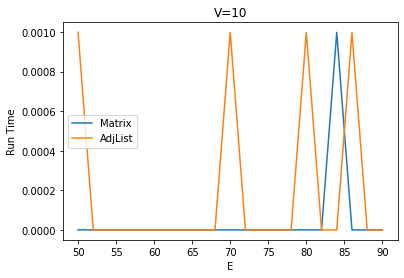

In [111]:
#Empricial analysis fix V=10
import matplotlib.pyplot as plt
plt.plot(plotAe, plotAt, label = 'Matrix')
plt.plot(plotBe, plotBt, label = 'AdjList')
plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=10')
plt.legend()
plt.show()

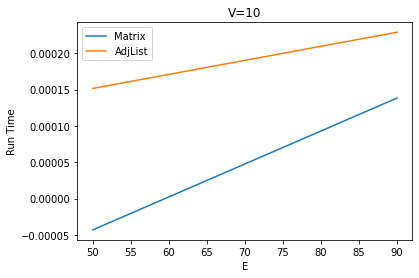

In [112]:
x1 = np.array(plotAe)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBe)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=10')
plt.legend()
plt.show()

In [92]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

n = 50
for e in range(200, 2475, 25):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(e)
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(e)
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

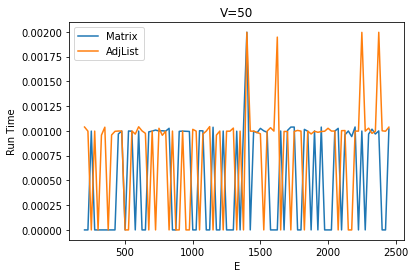

In [93]:
#Empricial analysis wrt to E
import matplotlib.pyplot as plt
plt.plot(plotAe, plotAt, label = 'Matrix')
plt.plot(plotBe, plotBt, label = 'AdjList')
plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=50')
plt.legend()
plt.show()

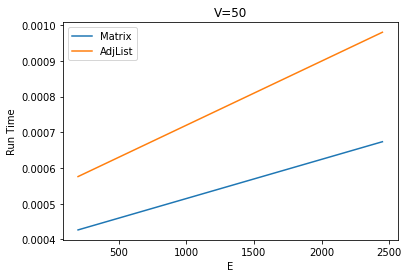

In [94]:
x1 = np.array(plotAe)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBe)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=50')
plt.legend()
plt.show()

In [95]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

n = 100
for e in range(1000, 9950, 50):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(len(G.edges))
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(len(G.edges))
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

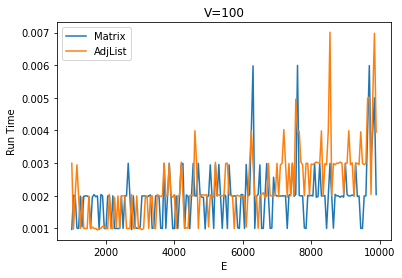

In [96]:
#Empricial analysis wrt to E
import matplotlib.pyplot as plt
plt.plot(plotAe, plotAt, label = 'Matrix')
plt.plot(plotBe, plotBt, label = 'AdjList')
plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=100')
plt.legend()
plt.show()

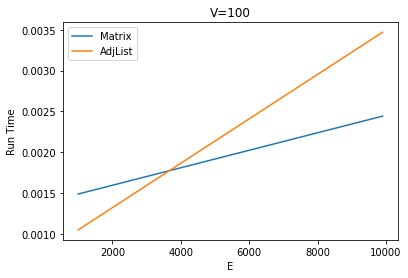

In [97]:
x1 = np.array(plotAe)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBe)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=100')
plt.legend()
plt.show()

In [98]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

n = 600
for e in range(5000, 359400, 1000):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    #print(e)
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(e)
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(e)
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

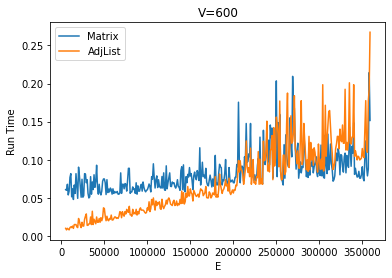

In [99]:
#Empricial analysis wrt to E
import matplotlib.pyplot as plt
plt.plot(plotAe, plotAt, label = 'Matrix')
plt.plot(plotBe, plotBt, label = 'AdjList')
plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=600')
plt.legend()
plt.show()

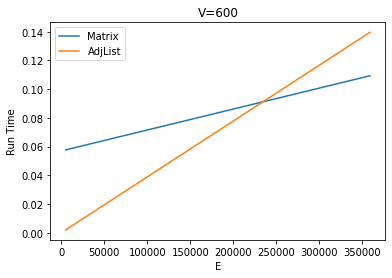

In [100]:
x1 = np.array(plotAe)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBe)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('V=600')
plt.legend()
plt.show()

In [101]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

e = 1000 
for n in range(35, 101, 1):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(len(G.edges))
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(len(G.edges))
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

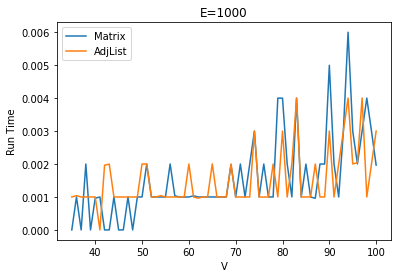

In [102]:
#Empricial analysis wrt to E
import matplotlib.pyplot as plt
plt.plot(plotAn, plotAt, label = 'Matrix')
plt.plot(plotBn, plotBt, label = 'AdjList')
plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('E=1000')
plt.legend()
plt.show()

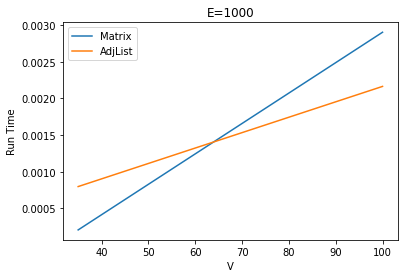

In [103]:
x1 = np.array(plotAn)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBn)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('E=1000')
plt.legend()
plt.show()

In [104]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

e = 10000 
for n in range(101, 600, 1):
    #print(n)
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(len(G.edges))
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(len(G.edges))
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

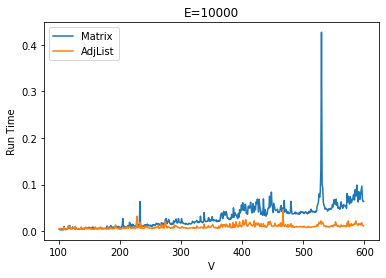

In [105]:
#Empricial analysis wrt to E
import matplotlib.pyplot as plt
plt.plot(plotAn, plotAt, label = 'Matrix')
plt.plot(plotBn, plotBt, label = 'AdjList')
plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('E=10000')
plt.legend()
plt.show()

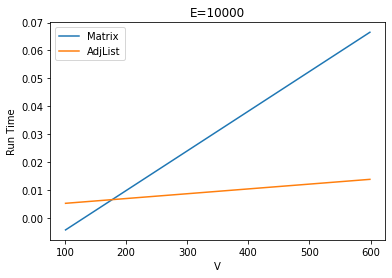

In [106]:
x1 = np.array(plotAn)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBn)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('E=10000')
plt.legend()
plt.show()

# Worst Case

In [113]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

for n in range(50, 601, 20):
    e = n**2-n
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    #print(e)
    #Dijkstra Algo for part(a)
    start = time.time()
    Dijkstra_MA(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(e)
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(e)
    plotBt.append(durationB)

#print(plotAn, plotAe, plotAt)
#print(plotBn, plotBe, plotBt)

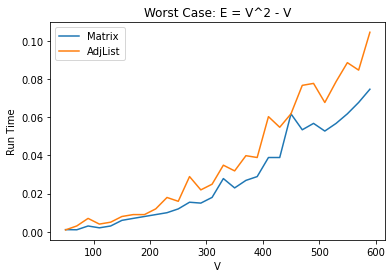

In [114]:
import matplotlib.pyplot as plt
plt.plot(plotAn, plotAt, label = 'Matrix')
plt.plot(plotBn, plotBt, label = 'AdjList')
plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('Worst Case: E = V^2 - V')
plt.legend()
plt.show()

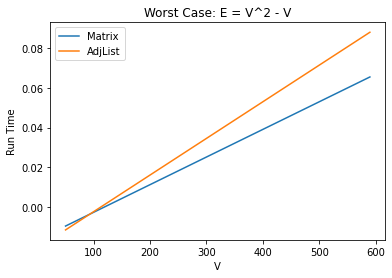

In [115]:
x1 = np.array(plotAn)
y1 = np.array(plotAt)
a1, b1 = np.polyfit(x1, y1, 1)

x2 = np.array(plotBn)
y2 = np.array(plotBt)
a2, b2 = np.polyfit(x2, y2, 1)

plt.plot(x1, a1*x1+b1, label = "Matrix")  
plt.plot(x2, a2*x2+b2, label= "AdjList")  

plt.xlabel('V')
plt.ylabel('Run Time')
plt.title('Worst Case: E = V^2 - V')
plt.legend()
plt.show()